In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brand-laptops-dataset/laptops.csv


In [7]:
df = pd.read_csv('/kaggle/input/brand-laptops-dataset/laptops.csv')
df.head()

,index,brand,Model,Price,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,secondary_storage_type,secondary_storage_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,resolution_width,resolution_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...,35990,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,51100,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1
3,4,acer,Acer Extensa EX214-53 Laptop (12th Gen Core i5...,39990,62,intel,core i5,12,16,8,...,No secondary storage,0,intel,integrated,False,14.0,1920,1080,windows,1
4,5,lenovo,Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...,28580,62,amd,ryzen 3,4,8,8,...,No secondary storage,0,amd,integrated,False,15.6,1920,1080,windows,1


In [8]:
df.shape

(991, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       991 non-null    int64  
 1   brand                       991 non-null    object 
 2   Model                       991 non-null    object 
 3   Price                       991 non-null    int64  
 4   Rating                      991 non-null    int64  
 5   processor_brand             991 non-null    object 
 6   processor_tier              991 non-null    object 
 7   num_cores                   991 non-null    int64  
 8   num_threads                 991 non-null    int64  
 9   ram_memory                  991 non-null    int64  
 10  primary_storage_type        991 non-null    object 
 11  primary_storage_capacity    991 non-null    int64  
 12  secondary_storage_type      991 non-null    object 
 13  secondary_storage_capacity  991 non

In [12]:
df["Model"]

0      Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...
1      Tecno Megabook T1 Laptop (11th Gen Core i7/ 16...
2      HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...
3      Acer Extensa EX214-53 Laptop (12th Gen Core i5...
4      Lenovo V15 82KDA01BIH Laptop (AMD Ryzen 3 5300...
                             ...                        
986    Asus Vivobook Pro 15 M6500QC-HN542WS Laptop (R...
987    MSI Thin GF63 12VE-070IN Gaming Laptop (12th G...
988    Asus Vivobook Go 15 2023 E1504FA-NJ522WS Lapto...
989    Asus Zenbook 14 2023 UM3402YA-KP541WS Laptop (...
990    HP Chromebook 15a-na0008TU Laptop (Intel Celer...
Name: Model, Length: 991, dtype: object

In [13]:
#Checking for NULL values
df.isna().sum()

index                         0
brand                         0
Model                         0
Price                         0
Rating                        0
processor_brand               0
processor_tier                0
num_cores                     0
num_threads                   0
ram_memory                    0
primary_storage_type          0
primary_storage_capacity      0
secondary_storage_type        0
secondary_storage_capacity    0
gpu_brand                     0
gpu_type                      0
is_touch_screen               0
display_size                  0
resolution_width              0
resolution_height             0
OS                            0
year_of_warranty              0
dtype: int64

In [14]:
#Checking fo Duplicate values
df.duplicated().sum()

0

In [15]:
df.describe()

,index,Price,Rating,num_cores,num_threads,ram_memory,primary_storage_capacity,secondary_storage_capacity,display_size,resolution_width,resolution_height
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,505.860747,77266.504541,63.931382,8.128153,12.191726,13.047427,610.938446,4.004036,15.171241,2003.503532,1181.227043
std,287.899458,57384.910269,10.190575,4.215499,5.585115,5.591188,266.927666,33.553936,0.938089,361.965292,263.884019
min,1.000000,9800.000000,24.000000,2.000000,0.000000,2.000000,32.000000,0.000000,10.100000,1080.000000,768.000000
25%,258.500000,43595.000000,58.000000,6.000000,8.000000,8.000000,512.000000,0.000000,14.000000,1920.000000,1080.000000
50%,507.000000,61900.000000,64.000000,8.000000,12.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1080.000000
75%,754.500000,89245.000000,71.000000,10.000000,16.000000,16.000000,512.000000,0.000000,15.600000,1920.000000,1200.000000
max,1002.000000,454490.000000,89.000000,24.000000,32.000000,36.000000,2048.000000,512.000000,18.000000,3840.000000,2560.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

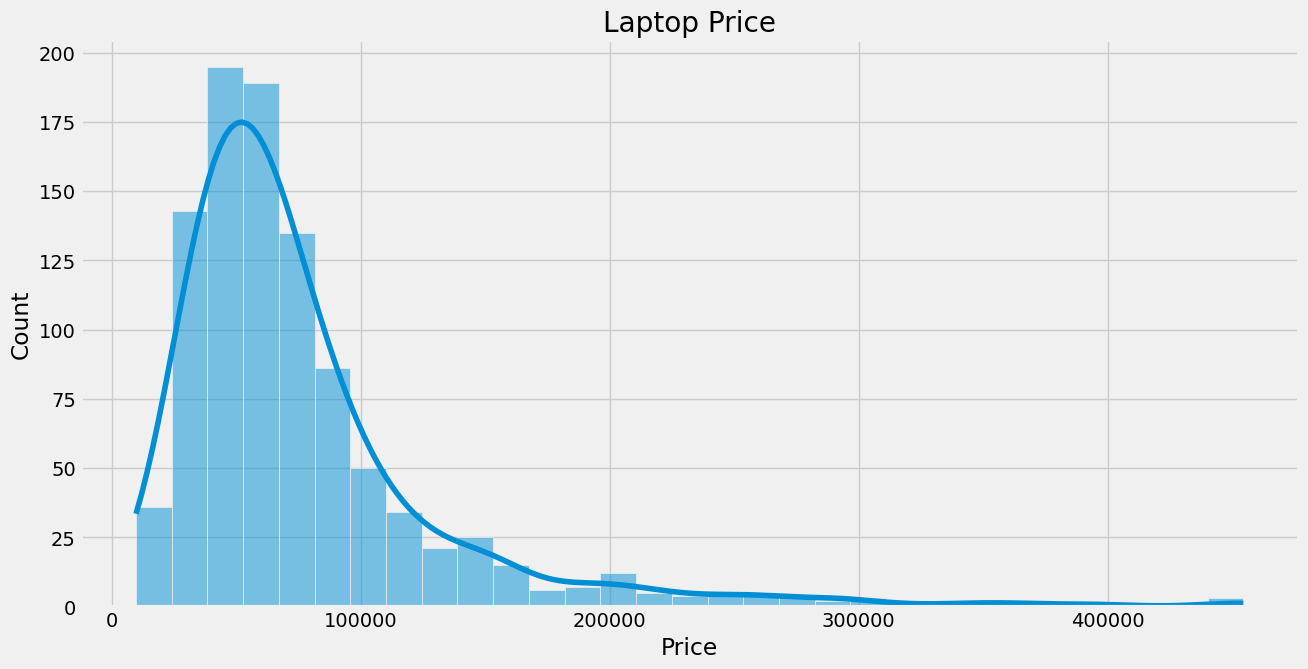

In [17]:
plt.style.use('fivethirtyeight')

plt.figure(figsize = (14, 7))
sns.histplot(data = df,
             x = 'Price',
             kde = True,
             bins = round(np.sqrt(len(df)))) # Applied Square Root Rule for bins count
plt.title("Laptop Price")
plt.show()

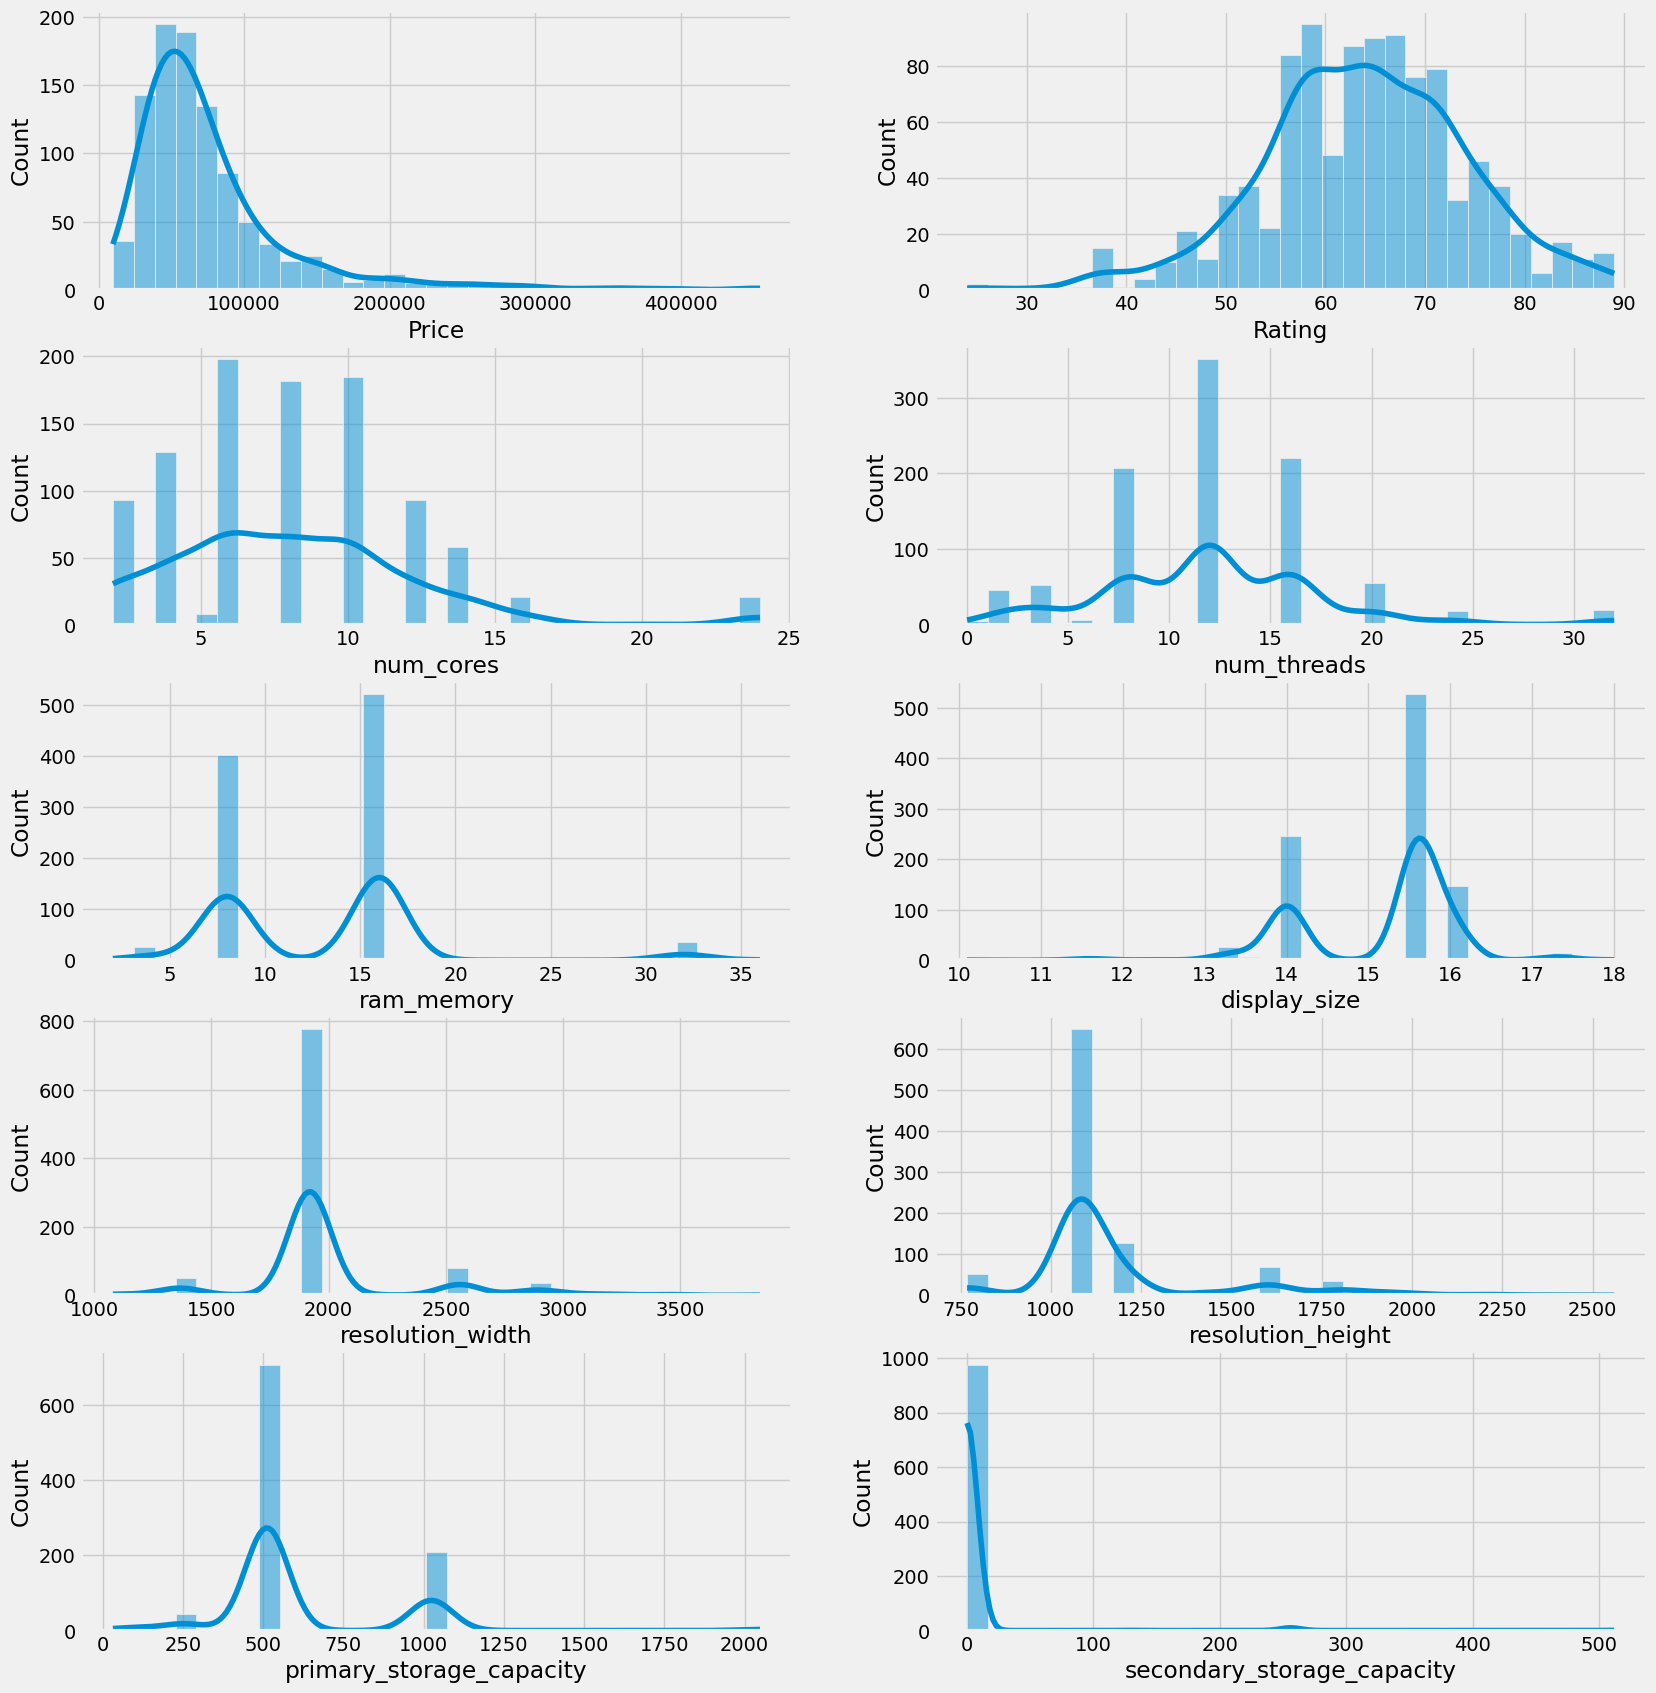

In [18]:
plt.style.use("fivethirtyeight")

columns = df[['Price', 'Rating', 'num_cores', 'num_threads', 'ram_memory', 'display_size', 'resolution_width', 'resolution_height', 'primary_storage_capacity', 'secondary_storage_capacity']]

plt.figure(figsize = (18, 20))
for i, col in enumerate(columns):
    plt.subplot(5, 2, i+1) 
    sns.histplot(data = columns, x = col, kde = True, bins = round(np.sqrt(len(df)))) # Applied Square Root Rule for bins count
plt.show()

In [19]:
OS_Counts = df['OS'].value_counts()
OS_Counts

OS
windows    924
dos         32
chrome      16
mac         15
other        2
android      1
ubuntu       1
Name: count, dtype: int64

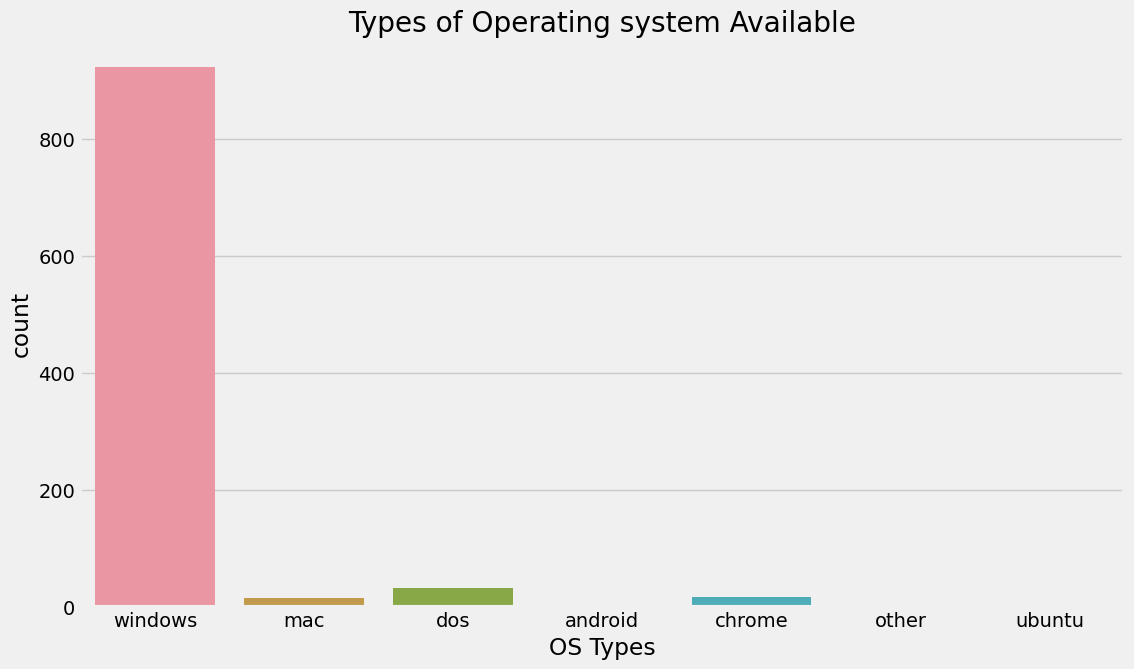

In [20]:
plt.figure(figsize = (12, 7))
sns.countplot(data = df, x = 'OS')
plt.title('Types of Operating system Available')
plt.xlabel('OS Types')
plt.ylabel = ('Count')
plt.show()

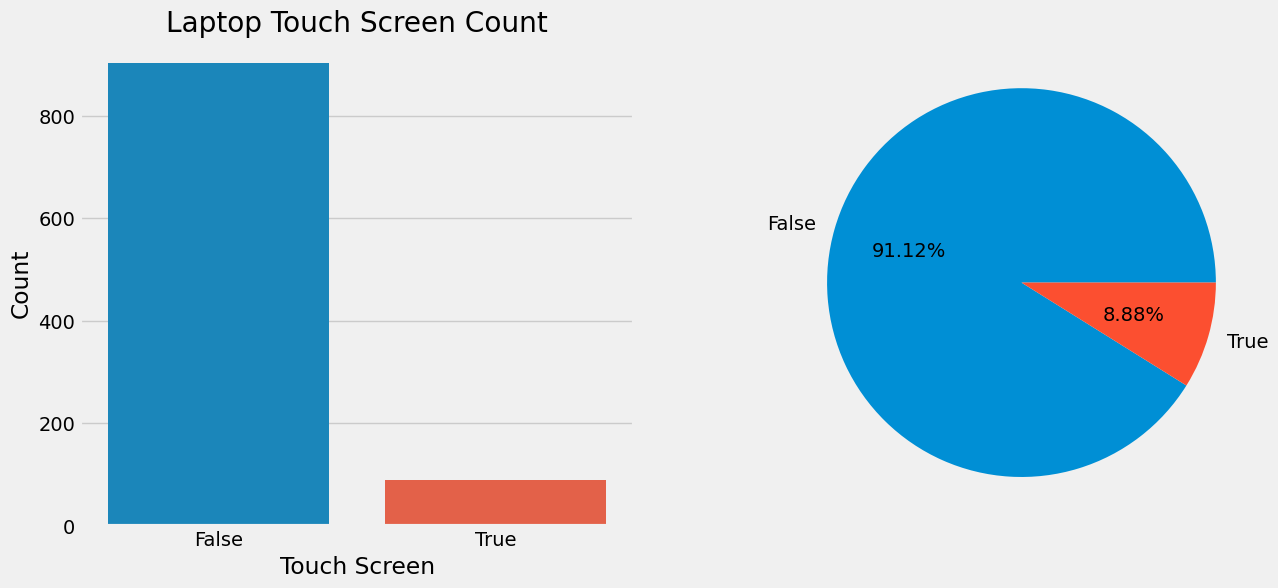

In [21]:
warranty_counts = df['is_touch_screen'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'is_touch_screen', ax=ax[0])
ax[0].set_title('Laptop Touch Screen Count')
ax[0].set_xlabel('Touch Screen')
ax[0].set_ylabel('Count')

ax[1].pie(df['is_touch_screen'].value_counts().values,
         labels = df['is_touch_screen'].value_counts().index, 
         autopct = '%1.2f%%')
plt.show()

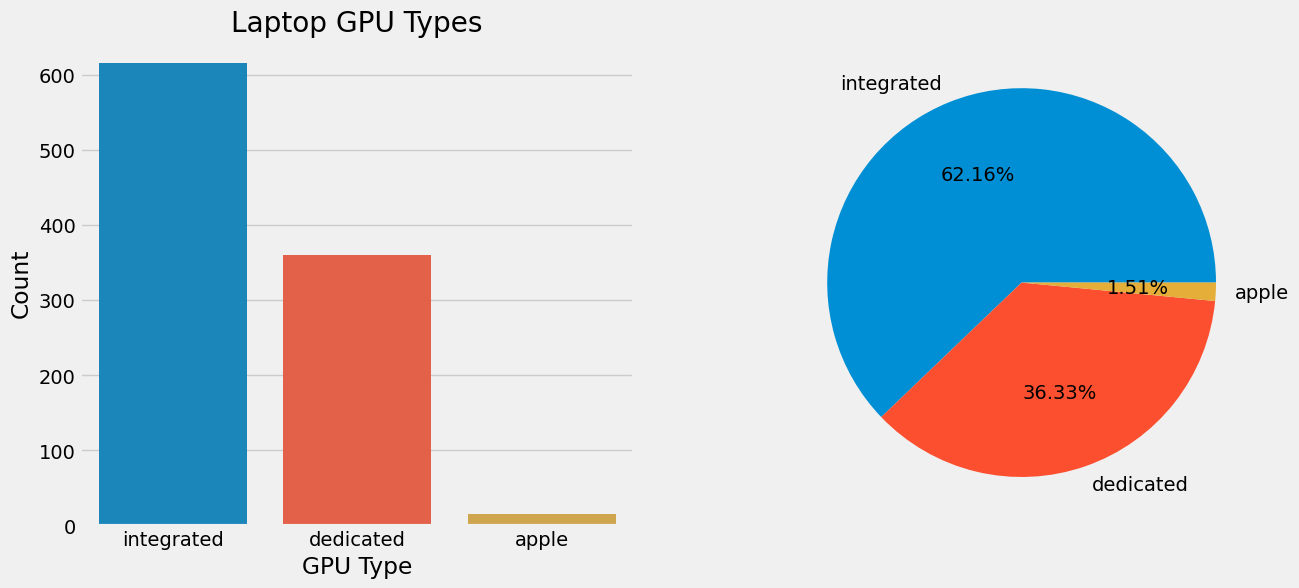

In [22]:
warranty_counts = df['gpu_type'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'gpu_type', ax=ax[0])
ax[0].set_title('Laptop GPU Types')
ax[0].set_xlabel('GPU Type')
ax[0].set_ylabel('Count')

ax[1].pie(df['gpu_type'].value_counts().values,
         labels = df['gpu_type'].value_counts().index, 
         autopct = '%1.2f%%')
plt.show()

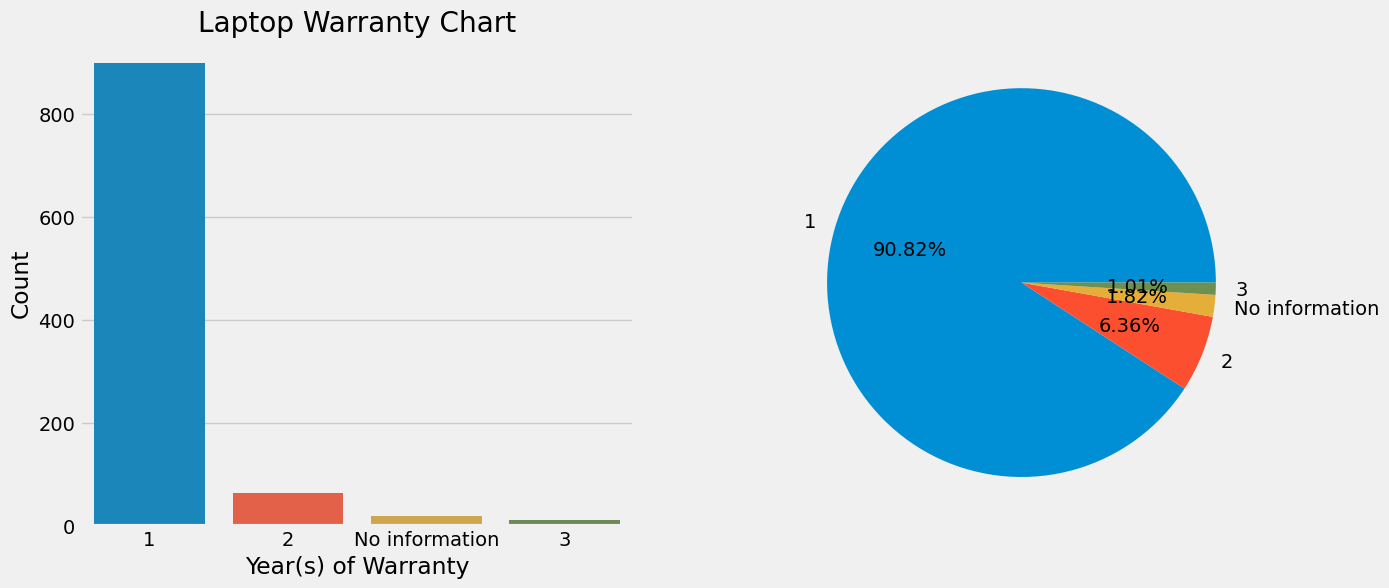

In [23]:
warranty_counts = df['year_of_warranty'].value_counts()
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data = df, x = 'year_of_warranty', ax=ax[0])
ax[0].set_title('Laptop Warranty Chart')
ax[0].set_xlabel('Year(s) of Warranty')
ax[0].set_ylabel('Count')

ax[1].pie(df['year_of_warranty'].value_counts().values,
         labels = df['year_of_warranty'].value_counts().index, 
         autopct = '%1.2f%%')
plt.show()

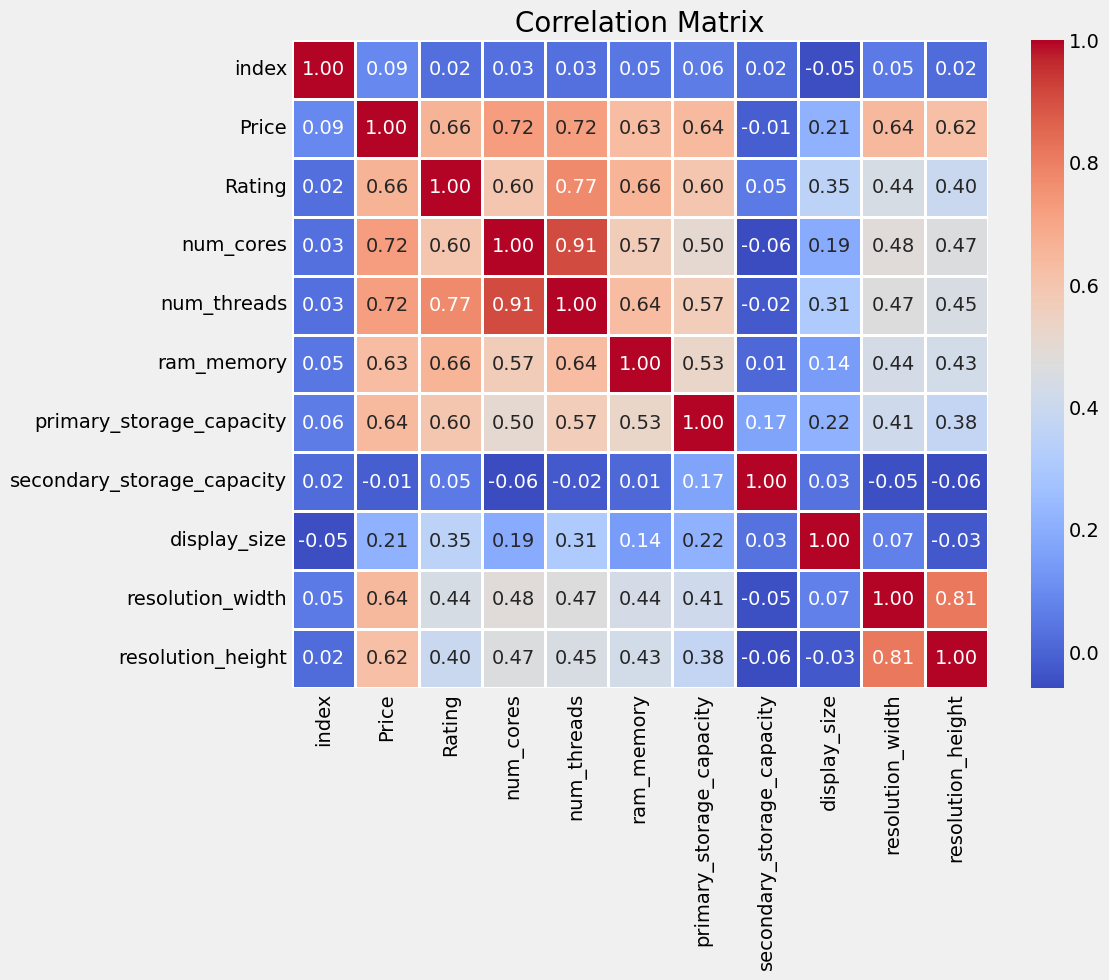

In [24]:
numerical_features = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

In [25]:
expBrands = df.groupby('brand')['Price'].mean().sort_values(ascending=False).head(10)
expBrands

brand
apple        193875.333333
lg           115284.714286
dell         101701.132075
msi           94260.433333
microsoft     88740.000000
fujitsu       82890.800000
gigabyte      80990.000000
asus          78290.223810
hp            76005.604878
samsung       67990.000000
Name: Price, dtype: float64

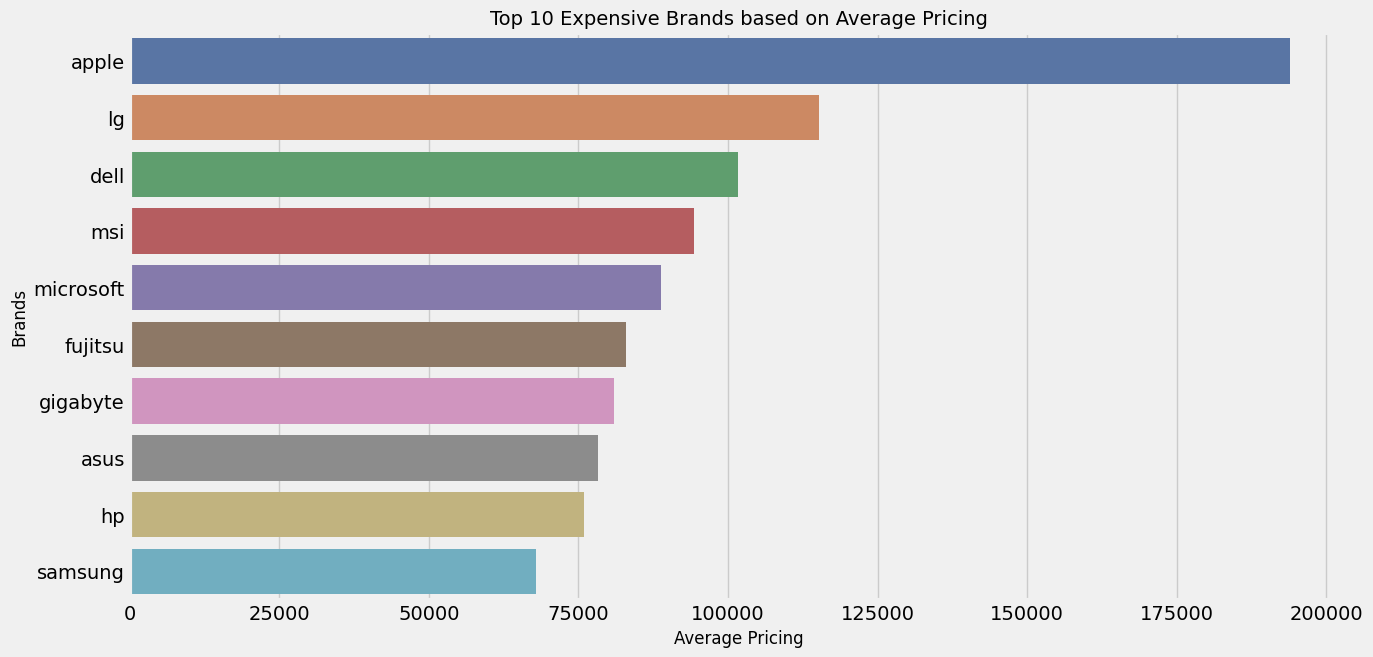

In [26]:
from importlib import reload
plt=reload(plt)
    
plt.figure(figsize=(14, 7))
sns.barplot(x=expBrands.values,
            y=expBrands.index,
            palette="deep")
plt.title('Top 10 Expensive Brands based on Average Pricing', size = 14)
plt.xlabel('Average Pricing', size = 12)
plt.ylabel('Brands', size = 12)
plt.show()

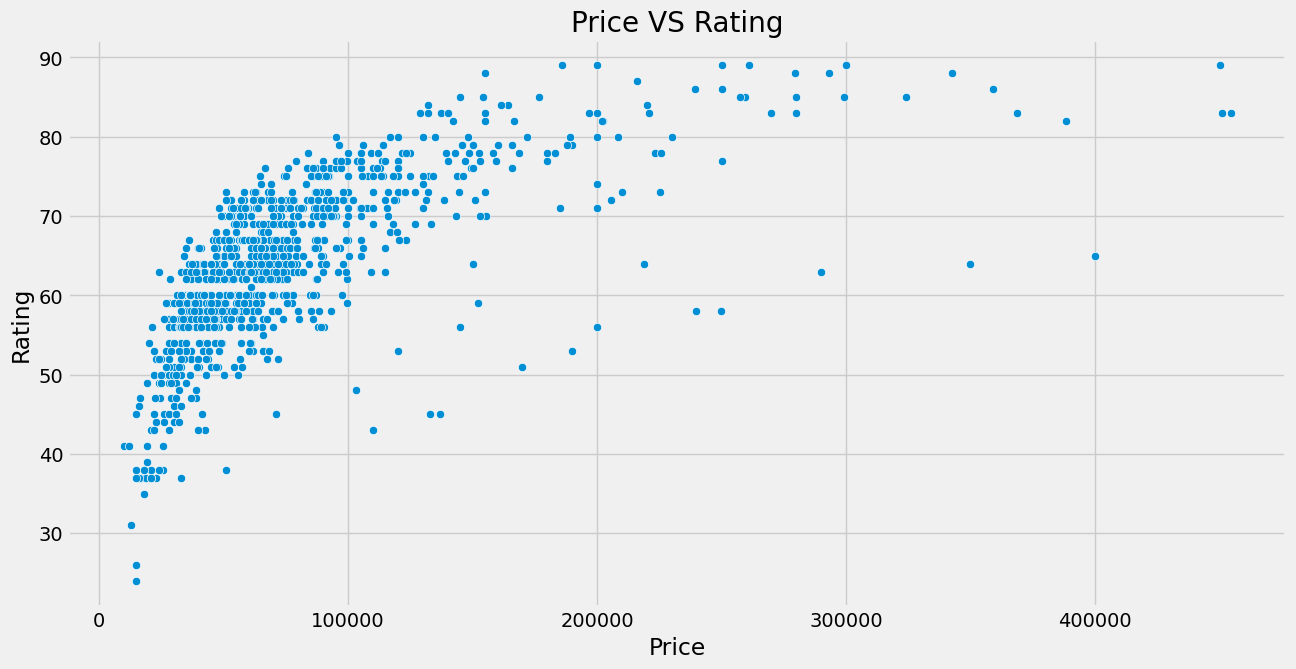

In [27]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data = df,
                x=df['Price'],
                y=df['Rating'])
plt.title('Price VS Rating')
plt.show()